In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data_path = '../data/'
venue_short = 'iclr2023'

date = '20230210'
df_finalRound = pd.read_csv(f'{data_path}{venue_short}_{date}.csv')

In [68]:
# view the name of each column
print(df_finalRound.columns)

Index(['id', 'title', 'keywords', 'ratings', 'confidences', 'withdraw',
       'review_lengths', 'decision'],
      dtype='object')


decision
Reject                     2277
Accept: poster             1195
Accept: notable-top-25%     279
Accept: notable-top-5%       91
Name: count, dtype: int64


<Axes: ylabel='proportion'>

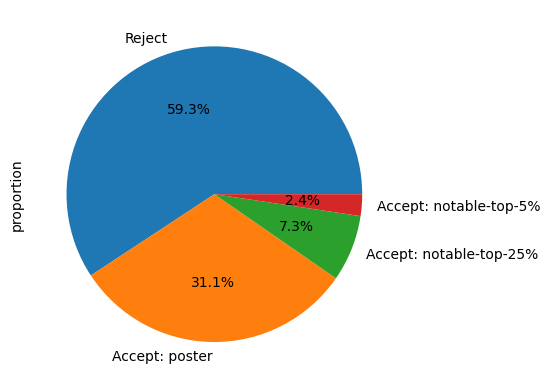

In [75]:
# view the percentage of 'dicision' column and visualize it as a pie chart
print(df_finalRound['decision'].value_counts())
# visualize the proportion of each decision on the same pie chart
df_finalRound['decision'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')


withdraw
0    0.790726
1    0.209274
Name: proportion, dtype: float64


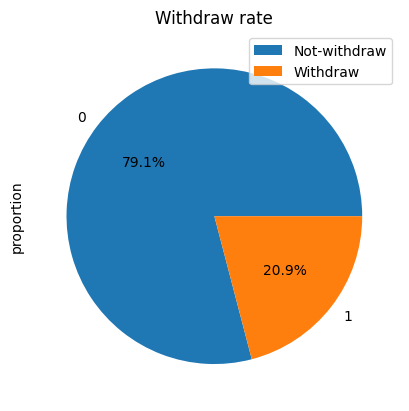

In [70]:
# view the percentage of 'withdraw' column
print(df_finalRound['withdraw'].value_counts(normalize=True))
# visualize the proportion of each decision on the same pie chart
df_finalRound['withdraw'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
# set the title of the pie chart
plt.title('Withdraw rate')
# modify the legend name, 0 means not-withdraw, 1 means withdraw
plt.legend(['Not-withdraw', 'Withdraw'])

In [71]:
data_path = '../data/'
venue_short = 'iclr2023'

date = '20221105'
# read the csv file for the first round review
df_firstRound = pd.read_csv(f'{data_path}{venue_short}_{date}.csv')

In [72]:
# view the columns of the first round review
print(df_firstRound.columns)

Index(['id', 'title', 'keywords', 'ratings', 'confidences', 'withdraw',
       'review_lengths'],
      dtype='object')


In [73]:
# find out if the 'id' column has same value between the first round review and the final round review
print(df_firstRound['id'].isin(df_finalRound['id']).value_counts(normalize=True))
# show the data of the 'id' column which is not in the final round review
df_firstRound[~df_firstRound['id'].isin(df_finalRound['id'])]

id
True     0.790111
False    0.209889
Name: proportion, dtype: float64


,id,title,keywords,ratings,confidences,withdraw,review_lengths
0,kRvZ2PcsxjJj,Quantum reinforcement learning,"['quantum reinforcement learning', 'multi-agen...","[1, 1, 1, 1]","[5, 5, 5, 5]",0,"[45, 49, 25, 283]"
12,91efl6aSU2d,Dual-Domain Diffusion Based Progressive Style ...,[],"[6, 5, 3]","[4, 4, 3]",0,"[352, 621, 675]"
13,KNL8KSH7b_F,UPop: Unified and Progressive Pruning for Comp...,"['Multimodal Model', 'Model Compression', 'Vis...","[5, 5, 6]","[3, 2, 3]",0,"[249, 179, 260]"
15,pGR2gNO5c4p,NeuralStagger: accelerating physics constraine...,[],"[5, 3, 5, 6]","[4, 3, 4, 3]",0,"[475, 599, 588, 518]"
16,s6l6ks1iooc,Towards Robust Online Dialogue Response Genera...,[],"[3, 5, 5, 3]","[4, 4, 4, 4]",0,"[374, 445, 614, 2028]"
...,...,...,...,...,...,...,...
4855,OZG9yDOz0b,Do Spiking Neural Networks Learn Similar Repre...,"['Spiking Neural Networks', 'Artificial Neural...","[3, 6, 3, 3]","[3, 5, 4, 4]",0,"[354, 241, 180, 526]"
4857,oQjWltREeRA,Generalized Category Discovery via Adaptive GM...,"['generalized category discovery', 'transfer l...","[5, 3, 6]","[5, 5, 3]",0,"[383, 701, 285]"
4862,nId8ZtIXub,Observation-Centric SORT: Rethinking SORT for ...,['multi-object tracking'],"[5, 6, 5]","[5, 4, 5]",0,"[734, 336, 620]"
4863,7hdmA0qtr5,scFormer: a universal representation learning ...,"['single-cell genomics', 'self-supervised lear...","[3, 1, 6, 3]","[4, 3, 4, 5]",0,"[820, 1050, 679, 399]"


In [74]:
import copy
# extract the ratings columns from the first round review
df_firstRound_rating = copy.deepcopy(df_firstRound[['id', 'ratings']])
# convert the string of ratings to list
df_firstRound_rating['ratings'] = df_firstRound_rating['ratings'].apply(lambda x: eval(x))
# find the data line that has 0 ratings
df_firstRound_rating[df_firstRound_rating['ratings'].apply(lambda x: len(x) == 0)]
# obtain the length of data line that has 0 ratings
count_0_ratings = len(df_firstRound_rating[df_firstRound_rating['ratings'].apply(lambda x: len(x) == 0)])
print("There are",count_0_ratings,"papers that have 0 ratings in the first round review.")
# df_firstRound_rating['avg_rating'] = df_firstRound_rating['ratings'].apply(lambda x: sum(x)/len(x))

There are 41 papers that have 0 ratings in the first round review.
